In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_da_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_da_us = df_da_us.dropna(subset=['salary_year_avg'])

<Axes: >

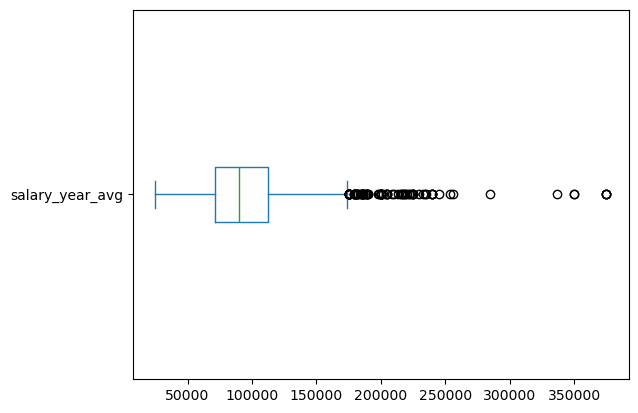

In [6]:
df_da_us['salary_year_avg'].plot(kind='box', vert=False)

/tmp/ipykernel_17922/4287720141.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


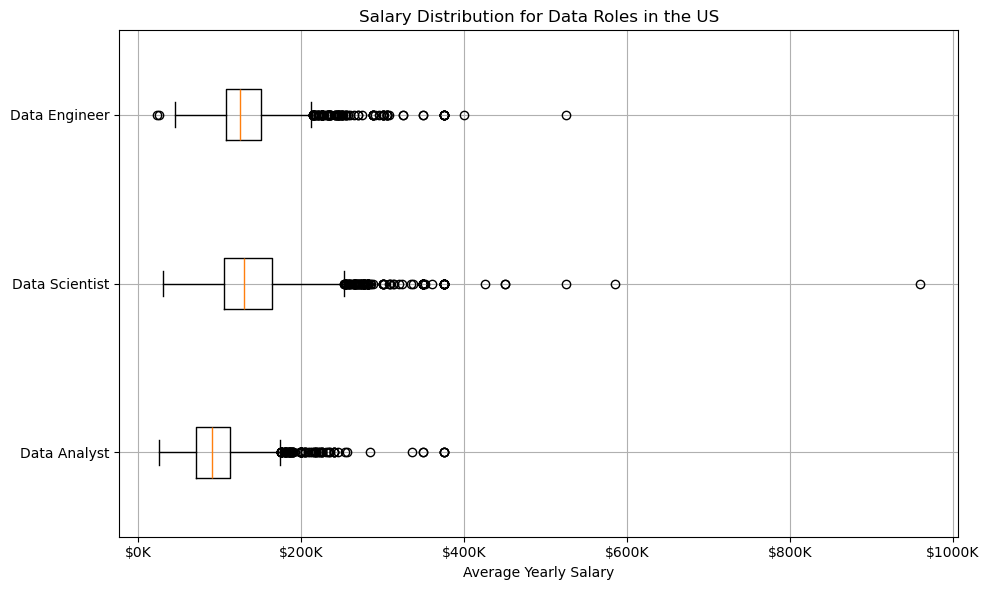

In [14]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Function to format salaries as $XXXK
def thousands_formatter(x, pos):
    return f'${int(x/1000)}K'

# Filtering and preparing data
job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']
df_us = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_us = df_us.dropna(subset=['salary_year_avg'])
job_list = [df_us[df_us['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

# Plotting
plt.figure(figsize=(10, 6))
plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title("Salary Distribution for Data Roles in the US")
plt.xlabel("Average Yearly Salary")
plt.gca().xaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.grid(True)
plt.tight_layout()
plt.show()
